In [161]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

In [162]:
handler = Signal_Handler()
display = Signal_Display()

# Задание 1

In [163]:
def Morlaix_Wavelet(x: np.ndarray, scale: float, f0: float):
    return np.exp(-x ** 2 / scale) * np.exp(2j * np.pi * x * f0)

In [164]:
x_1, y_1, dt = handler.make_signal('other',  interval = (-3, 3), func = lambda t: Morlaix_Wavelet(t, scale = 1, f0 = 1))
x_ft1, y_ft1 = handler.find_spectrum(y_1, dt)

c:\Users\Sanya\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


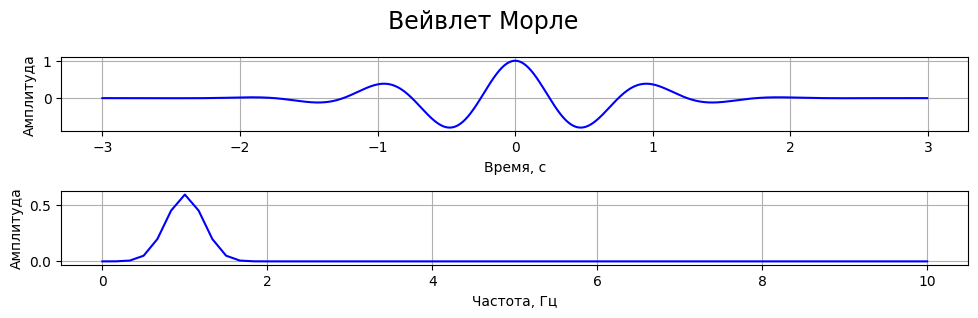

In [165]:
display.clear()

display.make_plot(0, x_1, y_1)
display.make_plot(1, x_ft1, y_ft1, is_spectrum = True,  interval = (0, 10))

display.plot(title = 'Вейвлет Морле')

# Задание 2

In [166]:
def MHAT_Wavelet(x: np.ndarray):
    return np.exp(-x ** 2 / 2) * (1 - x ** 2)

In [167]:
x_2, y_2, dt = handler.make_signal('other',  interval = (-4, 4), func = lambda t: MHAT_Wavelet(t))
x_ft2, y_ft2 = handler.find_spectrum(y_2, dt)

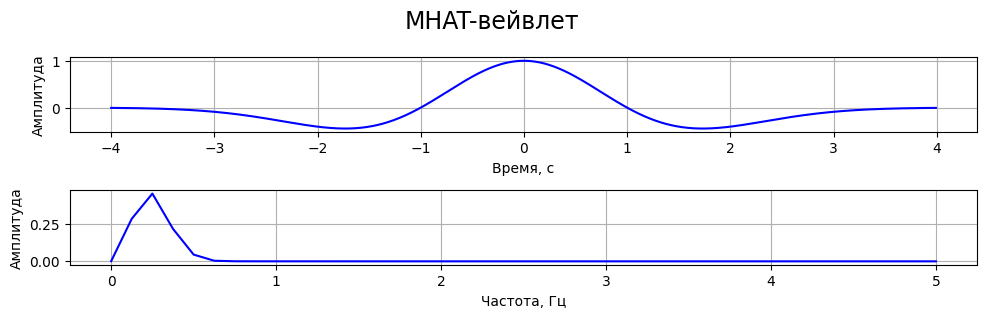

In [168]:
display.clear()

display.make_plot(0, x_2, y_2)
display.make_plot(1, x_ft2, y_ft2, is_spectrum = True,  interval = (0, 5))

display.plot(title = 'MHAT-вейвлет')

# Задание 3

In [169]:
def Haar_Wavelet(x: np.ndarray):

    wavelet = np.zeros_like(x)
    wavelet[(x >= 0) & (x < 0.5)] = 1
    wavelet[(x >= 0.5) & (x < 1)] = -1

    return wavelet

In [170]:
x_3, y_3, dt = handler.make_signal('other',  interval = (-4, 4), func = lambda t: Haar_Wavelet(t))
x_ft3, y_ft3 = handler.find_spectrum(y_3, dt)

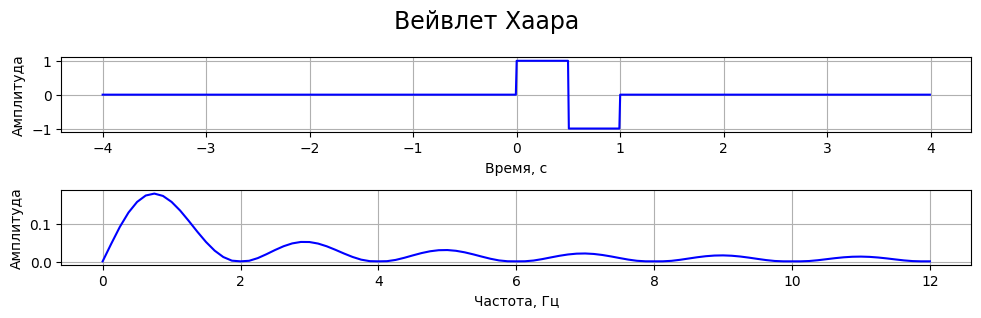

In [171]:
display.clear()

display.make_plot(0, x_3, y_3)
display.make_plot(1, x_ft3, y_ft3, is_spectrum = True,  interval = (0, 12))

display.plot(title = 'Вейвлет Хаара')

# Задание 4

In [172]:
x, y, dt = handler.make_signal('cos', interval = (0, 0.1), A = 1, w = Converter(f = [50, 250, 450]).w)
y += np.random.normal(0, 2, size = y.size)

x_ft, y_ft = handler.find_spectrum(y, dt)

In [173]:
y_conv1 = handler.convolve(y, y_1, mode = 'same')
y_conv2 = handler.convolve(y, y_2, mode = 'same')
y_conv3 = handler.convolve(y, y_3, mode = 'same')

In [174]:
y_conv_ft1 = handler.find_spectrum(y_conv1, dt)[1]
y_conv_ft2 = handler.find_spectrum(y_conv2, dt)[1]
y_conv_ft3 = handler.find_spectrum(y_conv3, dt)[1]

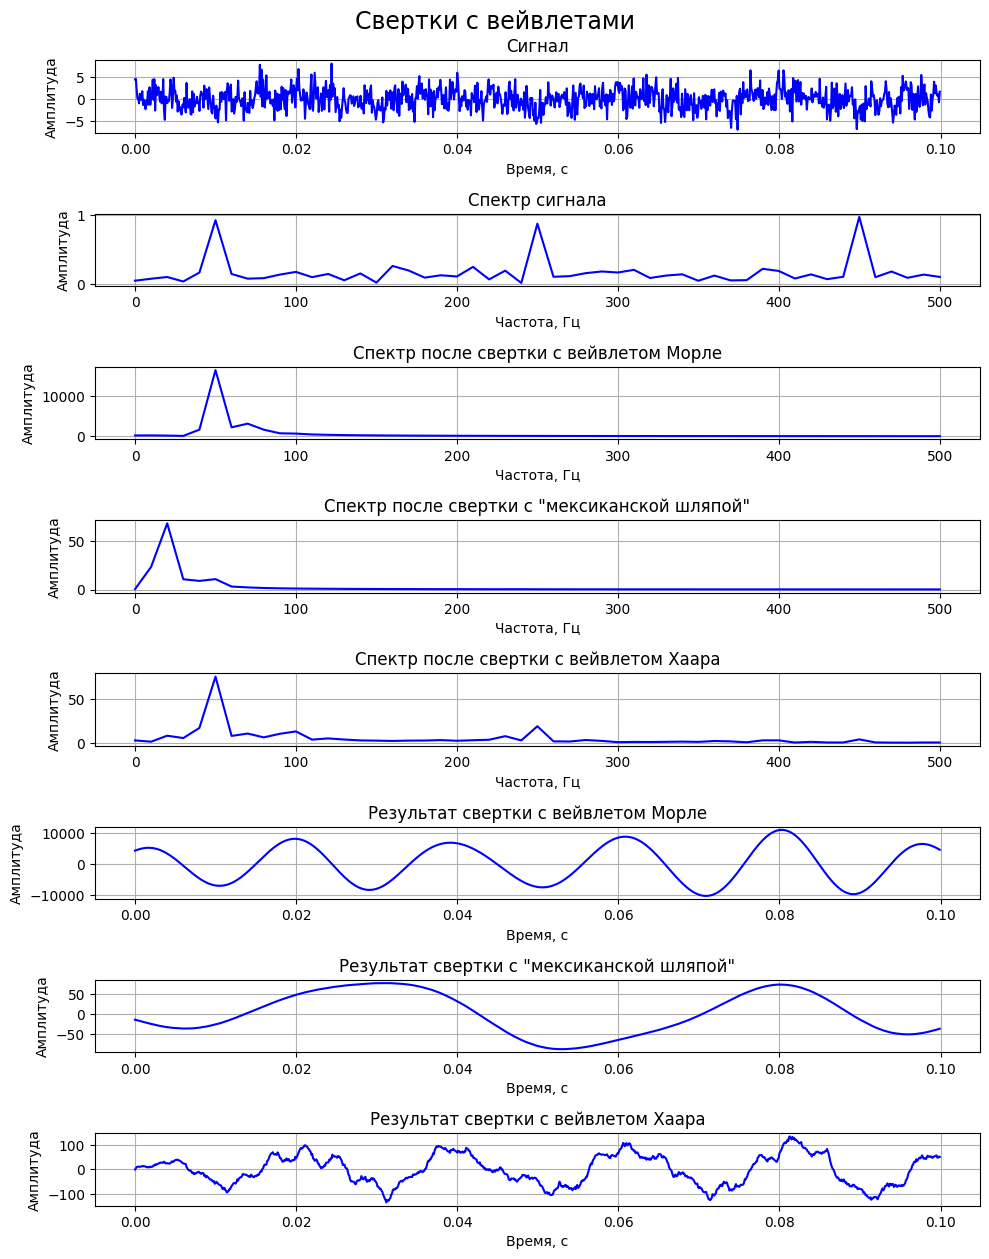

In [175]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_ft, y_ft, title = 'Спектр сигнала', is_spectrum = True,  interval = (0, 500))

display.make_plot(2, x_ft, y_conv_ft1, is_spectrum = True, interval = (0, 500), title = 'Спектр после свертки с вейвлетом Морле')
#display.make_plot(2, x_ft1, y_ft1, is_spectrum = True, linestyle = '--', color = 'red')

display.make_plot(3, x_ft, y_conv_ft2, is_spectrum = True, interval = (0, 500), title = 'Спектр после свертки с "мексиканской шляпой"')
#display.make_plot(3, x_ft2, y_ft2, is_spectrum = True, linestyle = '--', color = 'red')

display.make_plot(4, x_ft, y_conv_ft3, is_spectrum = True, interval = (0, 500), title = 'Спектр после свертки с вейвлетом Хаара')
#display.make_plot(4, x_ft3, y_ft3, is_spectrum = True, linestyle = '--', color = 'red')

display.make_plot(5, x, y_conv1, title = 'Результат свертки с вейвлетом Морле')
display.make_plot(6, x, y_conv2, title = 'Результат свертки с "мексиканской шляпой"')
display.make_plot(7, x, y_conv3, title = 'Результат свертки с вейвлетом Хаара')

display.plot(title = 'Свертки с вейвлетами')

# Задание 5

In [176]:
x, y, dt = [], [], 0

for interval, f in zip([(-3, -1), (-1, 0), (0, 1), (1, 3)], [5, 7, 8, 6]):

    x0, y0, dt = handler.make_signal('cos', interval = interval, A = 1, w = Converter(f = f).w)
    x = np.concatenate([x, x0])
    y = np.concatenate([y, y0])

xfft, yfft = handler.find_spectrum(y, dt)

In [177]:
y_conv = handler.convolve(y, y_1, mode = 'same')

(0.0, 20.0)

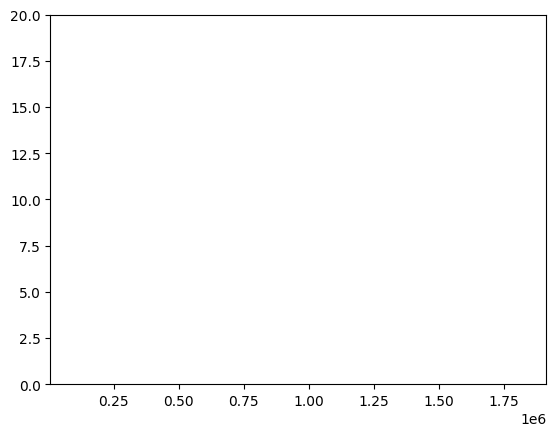

In [197]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(y, y.size / 6)
plt.pcolormesh(t, f, Sxx)

plt.ylim([0, 20])

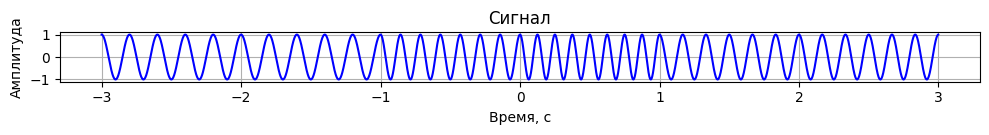

In [ ]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')

display.plot()